In [ ]:
## 2.1

Download adjusted closing prices for CVX and SPY from Yahoo Finance and compute annual returns.  Get the prices with only one call to the pandas data reader by inputting the list ["CVX", "SPY"] as the first argument.  Use "1970-01-01" as the start date and "2021-12-31" as the end date.  Compute and plot the annual returns.  

[*********************100%%**********************]  2 of 2 completed


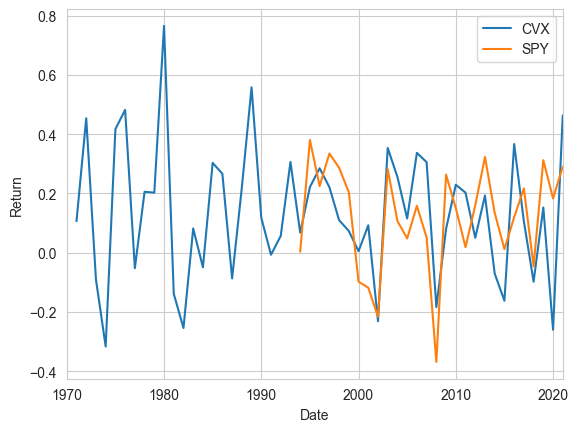

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")

price = yf.download(["CVX", "SPY"], start="1970-01-01", end="2021-12-31")["Adj Close"]
price = price.resample("Y").last()
ret = price.pct_change()
ret.plot()
plt.ylabel("Return")
plt.show()

## 2.2

Download adjusted closing prices for AAPL and compute daily, monthly, and annual returns for the five-year period 2017-2021.  Construct three box plots - one for each set of returns.  Use "2016-12-30" as the start date.  In a Markdown cell, answer: What can we tell about outliers from the box plots?

[*********************100%%**********************]  1 of 1 completed


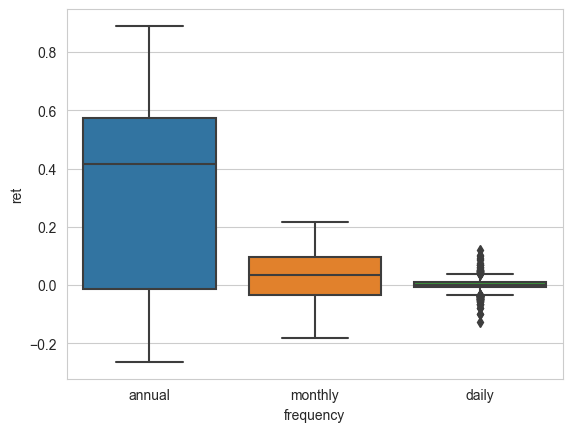

In [9]:
import pandas as pd 

price = yf.download("AAPL", start="2016-12-30")["Adj Close"]
annual = price.resample("Y").last().pct_change()
monthly = price.resample("M").last().pct_change()
daily = price.pct_change()

df = None
for d , n in zip([annual, monthly, daily], ["annual", "monthly", "daily"]):
    d = pd.DataFrame(d)
    d.columns = ["ret"]
    d["frequency"] = n 
    df = pd.concat((df, d))

sns.boxplot(df, y="ret", x="frequency")
plt.show()


The boxplots show that the daily returns have many outliers.  Annual and monthly do not.

## 2.3

Using Yahoo's adjusted closing prices, compute annual returns for AAPL for the period 2000 through 2021.  Calculate the arithmetic average annual return and the geometric average annual return.

In [11]:
price = yf.download("AAPL", start="1999-01-01", end="2021-12-31")["Adj Close"]
ret = price.resample("Y").last().pct_change()
arithmetic = ret.mean()
geometric = (1+ret).prod()**(1/len(ret)) - 1
print(f"The arithmetic average annual return is {arithmetic:.1%}")
print(f"The geometric average annual return is {geometric:.1%}")

[*********************100%%**********************]  1 of 1 completed
The arithmetic average annual return is 44.3%
The geometric average annual return is 26.6%


## 2.4

Draw 1,000 sets of 30 normally distributed random variables with a mean of 6% and a standard deviation of 10%. Viewing the variables as annual returns, compound them year by year over each 30-year period to obtain 1,000 time series of accumulations .

(1) Calculate and plot the standard deviation of the accumulations through each year (the x-axis should be 1, 2, ..., 30 and the y-axis should be the std dev of the accumulation through year 1, year 2, ..., year 30).  

(2) If the accumulation is less than 1, then an investment has lost money.
 Calculate and plot the fraction of the 1,000 returns for which the accumulation is less than 1 year-by-year (the plot should be the same as in (1) but the y-axis should have the fraction of losses through year 1, year 2, ..., year 30).  

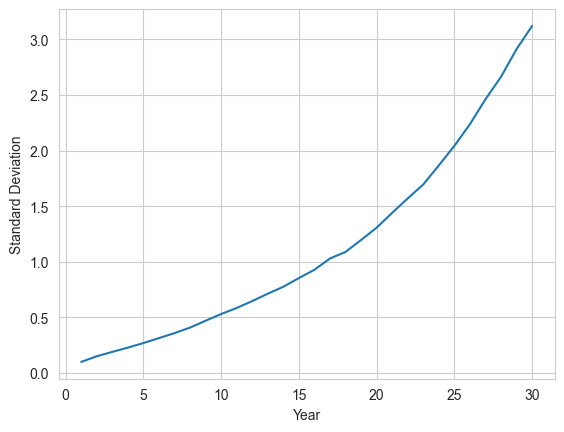

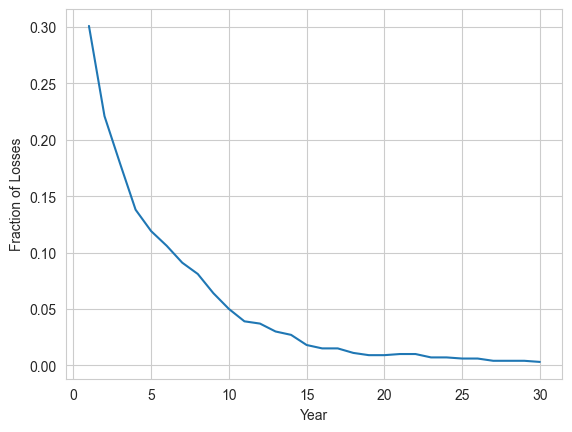

In [15]:
import numpy as np 

ret = np.random.normal(loc=0.06, scale=0.1, size=(30, 1000))
accums = np.cumprod(1+ret, axis=0)
stdevs = np.std(accums, axis=1)
losses = np.sum(accums<1, axis=1) / 1000 

plt.plot(range(1, 31), stdevs)
plt.xlabel("Year")
plt.ylabel("Standard Deviation")
plt.show()

plt.plot(range(1, 31), losses)
plt.xlabel("Year")
plt.ylabel("Fraction of Losses")
plt.show()